In [25]:
import os
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

import scipy.stats as stats

%matplotlib inline


Gather all 5 data files into one dataframe

In [26]:
all_files = [f for f in os.listdir('data') if f.endswith('csv')]

li = []

for filename in all_files:
    df = pd.read_csv('data/' + filename, index_col=None, header=0)
    li.append(df)

all5yrsdf = pd.concat(li, axis=0, ignore_index=True)


In [27]:

all5yrsdf.shape


(43299, 7)

In [28]:
all5yrsdf.memory_usage()

Index                       128
Date/Time (PST)          346392
Battery Voltage (v)      346392
Temperature (deg F)      346392
Relative Humidity (%)    346392
Precipitation (")        346392
Total Snow Depth (")     346392
24 Hour Snow (")         346392
dtype: int64

In [29]:
all5yrsdf.dtypes

Date/Time (PST)           object
Battery Voltage (v)      float64
Temperature (deg F)      float64
Relative Humidity (%)    float64
Precipitation (")        float64
Total Snow Depth (")     float64
24 Hour Snow (")         float64
dtype: object

In [30]:
all5yrsdf.describe()

,Battery Voltage (v),Temperature (deg F),Relative Humidity (%),"Precipitation ("")","Total Snow Depth ("")","24 Hour Snow ("")"
count,43289.000000,43289.000000,43289.000000,43289.000000,43289.000000,43287.000000
mean,13.256071,42.313870,85.250672,13.640204,34.190576,11.833158
std,0.315160,14.022337,17.770345,145.724825,37.720990,147.903798
min,11.000000,0.121000,13.470000,0.000000,-4.168000,-7999.000000
25%,13.150000,32.440000,79.820000,0.000000,5.646000,0.310000
50%,13.280000,40.300000,93.200000,0.000000,19.940000,1.377000
75%,13.290000,51.170000,97.200000,0.010000,59.320000,32.540000
max,16.270000,95.300000,100.000000,2155.000000,237.400000,467.400000


In [31]:
all5yrsdf['Date/Time (PST)'].describe()

count                43299
unique               43299
top       2019-02-28 17:00
freq                     1
Name: Date/Time (PST), dtype: object

In [32]:
all5yrsdf.columns = all5yrsdf.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
all5yrsdf = all5yrsdf.rename(columns={'date/time_pst': 'dt_time_pst','relative_humidity_%':'rel_humidity_percent', 'precipitation_"': 'precip', 'total_snow_depth_"': 'total_snow_depth', '24_hour_snow_"': '24_hr_snow'})

In [33]:
all5yrs_sorted_df = all5yrsdf.sort_values('dt_time_pst')
#all5yrs_sorted_df

In [34]:
all5yrs_dtdf = all5yrs_sorted_df.copy()
all5yrs_dtdf['dt_time_pst'] = pd.to_datetime(all5yrs_sorted_df['dt_time_pst'])

In [35]:
all5yrs_dtdf.drop('battery_voltage_v', axis=1, inplace=True)

In [36]:
all5yrs_dtdf['dt_time_pst'].dt.year

8240     2015
8239     2015
8238     2015
8237     2015
8236     2015
         ... 
25790    2019
25789    2019
25788    2019
25787    2019
25786    2019
Name: dt_time_pst, Length: 43299, dtype: int64

In [37]:
fulldec_df = all5yrs_dtdf[(all5yrs_dtdf['dt_time_pst'].dt.month == 12)]

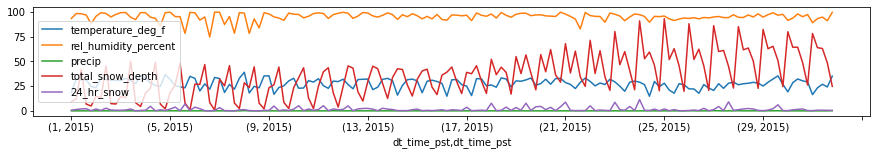

In [38]:
# This graph too busy, do not use.

fulldec_df.groupby(by=[fulldec_df['dt_time_pst'].dt.day, fulldec_df['dt_time_pst'].dt.year]).mean().plot(figsize=(15,2))

In [39]:
fulldec_df

,dt_time_pst,temperature_deg_f,rel_humidity_percent,precip,total_snow_depth,24_hr_snow
743,2015-12-01 00:00:00,17.34,93.2,0.01,8.10,0.190
742,2015-12-01 01:00:00,17.22,92.4,0.00,8.10,0.190
741,2015-12-01 02:00:00,17.22,92.1,0.00,8.77,0.190
740,2015-12-01 03:00:00,17.10,92.2,0.01,9.50,0.456
739,2015-12-01 04:00:00,17.10,92.2,0.02,7.77,0.323
...,...,...,...,...,...,...
25790,2019-12-31 19:00:00,37.69,99.4,0.21,24.44,0.450
25789,2019-12-31 20:00:00,40.49,100.0,0.34,21.64,0.450
25788,2019-12-31 21:00:00,41.10,100.0,0.16,21.31,0.450
25787,2019-12-31 22:00:00,41.10,99.2,0.06,21.11,0.317


In [40]:
fulldec_SR_df = fulldec_df.copy()
rainmask = fulldec_SR_df['temperature_deg_f'] > 32
snowmask = fulldec_SR_df['temperature_deg_f'] <= 32
fulldec_SR_df['hrly_rain'] = fulldec_SR_df['precip'][rainmask]
fulldec_SR_df['hrly_snow'] = fulldec_SR_df['precip'][snowmask]

fulldec_SR_df['hrly_rain'] = fulldec_SR_df['hrly_rain'].fillna(0)
fulldec_SR_df['hrly_snow'] = fulldec_SR_df['hrly_snow'].fillna(0)

fulldec_SR_df

,dt_time_pst,temperature_deg_f,rel_humidity_percent,precip,total_snow_depth,24_hr_snow,hrly_rain,hrly_snow
743,2015-12-01 00:00:00,17.34,93.2,0.01,8.10,0.190,0.00,0.01
742,2015-12-01 01:00:00,17.22,92.4,0.00,8.10,0.190,0.00,0.00
741,2015-12-01 02:00:00,17.22,92.1,0.00,8.77,0.190,0.00,0.00
740,2015-12-01 03:00:00,17.10,92.2,0.01,9.50,0.456,0.00,0.01
739,2015-12-01 04:00:00,17.10,92.2,0.02,7.77,0.323,0.00,0.02
...,...,...,...,...,...,...,...,...
25790,2019-12-31 19:00:00,37.69,99.4,0.21,24.44,0.450,0.21,0.00
25789,2019-12-31 20:00:00,40.49,100.0,0.34,21.64,0.450,0.34,0.00
25788,2019-12-31 21:00:00,41.10,100.0,0.16,21.31,0.450,0.16,0.00
25787,2019-12-31 22:00:00,41.10,99.2,0.06,21.11,0.317,0.06,0.00


In [68]:
rain = fulldec_SR_df.groupby(fulldec_SR_df['dt_time_pst'].dt.day)['hrly_rain'].sum()
snow = fulldec_SR_df.groupby(fulldec_SR_df['dt_time_pst'].dt.day)['hrly_snow'].sum()
#print(rain, snow)

ratio = rain/snow
#print(ratio)
#print(ratio.mean())

inf


dt_time_pst
2015    14.60
2016     3.74
2017     9.15
2018     4.83
2019    11.95
Name: hrly_rain, dtype: float64 dt_time_pst
2015    18.12
2016     9.11
2017     5.87
2018    14.83
2019     4.88
Name: hrly_snow, dtype: float64
dt_time_pst
2015    0.805740
2016    0.410538
2017    1.558773
2018    0.325691
2019    2.448770
dtype: float64
1.1099024934738313


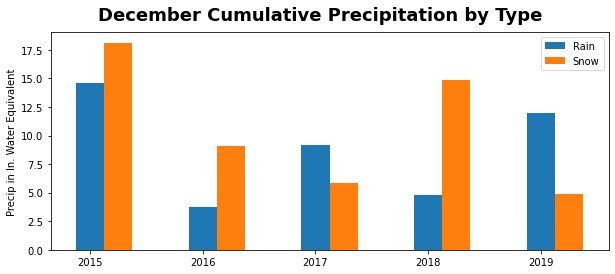

In [46]:
#Null Hypothesis: It rains as much as it snows at this location in December.

rain = fulldec_SR_df.groupby(fulldec_SR_df['dt_time_pst'].dt.year)['hrly_rain'].sum()
snow = fulldec_SR_df.groupby(fulldec_SR_df['dt_time_pst'].dt.year)['hrly_snow'].sum()


print(rain, snow)

ratio = rain/snow
print(ratio)
print(ratio.mean())
 #create visualizations here illustrating quantity of rain versus snow grouped by year

fig, ax = plt.subplots(figsize=(10,4))

ax.bar(rain.index, rain, width=0.25, label='Rain')
ax.bar(snow.index + 0.25, snow, width=0.25, label='Snow')
ax.set_ylabel('Precip in In. Water Equivalent')
ax.legend()
plt.suptitle('December Cumulative Precipitation by Type',y=0.97,fontsize=18, fontweight='bold')

plt.savefig('img/precip_totals.jpg')



Rain Mean:  0.011897339424885784, Rain StdDev:  0.04132289838687015
Snow Mean: 0.01419242139209893, Snow StdDev: 0.04629672364183974


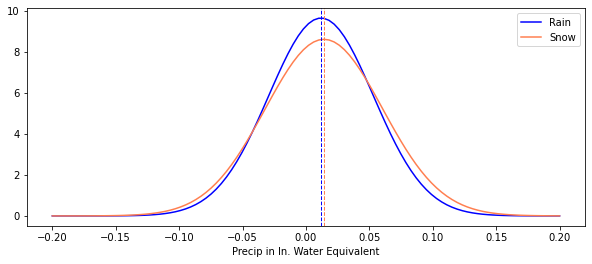

In [73]:
#  Perform Bayesian analysis here for determining the probability that there will be a greater quantity of
#  rain than snow in future winter seasons based on the evidence gathered from the last 5 years.


#  Assume normal distribution.  Need to find means and standard deviations of hourly quantities of rain and snow.

#Not sure if I need means and variance by month or total.  Set up all below just in case.

rain_mean_monthly = fulldec_SR_df.groupby(fulldec_SR_df['dt_time_pst'].dt.year)['hrly_rain'].mean()
rain_sd_monthly = fulldec_SR_df.groupby(fulldec_SR_df['dt_time_pst'].dt.year)['hrly_rain'].std()

snow_mean_monthly = fulldec_SR_df.groupby(fulldec_SR_df['dt_time_pst'].dt.year)['hrly_snow'].mean()
snow_sd_monthly = fulldec_SR_df.groupby(fulldec_SR_df['dt_time_pst'].dt.year)['hrly_rain'].std()

full_rain_mean = fulldec_SR_df['hrly_rain'].mean()
full_rain_sd = fulldec_SR_df['hrly_rain'].std()

full_snow_mean = fulldec_SR_df['hrly_snow'].mean()
full_snow_sd = fulldec_SR_df['hrly_snow'].std()

print(f'Rain Mean:  {full_rain_mean}, Rain StdDev:  {full_rain_sd}')
print(f'Snow Mean: {full_snow_mean}, Snow StdDev: {full_snow_sd}')


x_min = -0.2
x_max = 0.2
x = np.linspace(x_min, x_max, 100)

yrain = stats.norm.pdf(x,full_rain_mean,full_rain_sd)
ysnow = stats.norm.pdf(x,full_snow_mean, full_snow_sd)

fig, ax = plt.subplots(figsize=(10,4))

ax.plot(x,yrain, color='blue',label='Rain')
ax.plot(x,ysnow, color='coral', label='Snow')
plt.axvline(full_rain_mean, ls='--', lw=1, color='blue')
plt.axvline(full_snow_mean, ls='--', lw=1, color='coral')
ax.set_xlabel('Precip in In. Water Equivalent')
ax.legend()
plt.savefig('img/daily_precip_means.jpg')

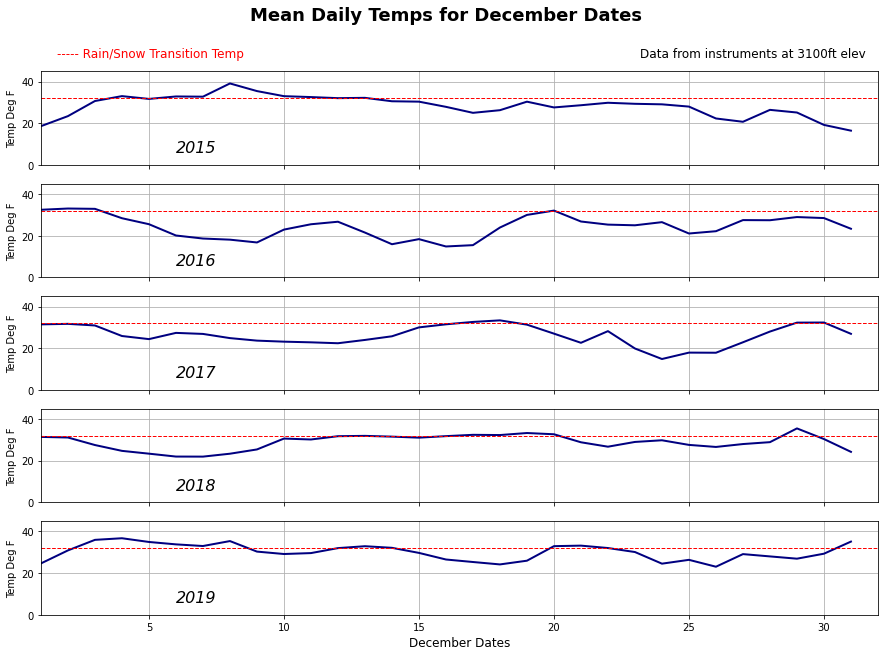

In [55]:
#This cell will plot means of daily temperatures for each year in the set

fig, axs = plt.subplots(5,1, figsize = (15, 10), sharex = True, sharey=True)


for i, year in enumerate([2015, 2016, 2017, 2018, 2019]):
    #print(year)
    x = fulldec_df['dt_time_pst'].dt.day.unique()
    yrmask = fulldec_df['dt_time_pst'].dt.year == year
    ymean = fulldec_df[yrmask]['temperature_deg_f'].groupby(fulldec_df['dt_time_pst'].dt.day).mean()
    ymax = fulldec_df[yrmask]['temperature_deg_f'].groupby(fulldec_df['dt_time_pst'].dt.day).max()
    ymin = fulldec_df[yrmask]['temperature_deg_f'].groupby(fulldec_df['dt_time_pst'].dt.day).min()
    
    
    axs[i].set_ylabel('Temp Deg F')
    
    axs[i].plot(x, ymean, color='navy', lw=2, label=year)
    axs[i].axis([1,32, 0, 45])
    axs[i].text(6, 6, year, style='italic', fontsize=16)
   
    axs[i].grid()
    axs[i].axhline(32, 0,31, ls='--', lw=1, color='red')
    
axs[4].set_xlabel('December Dates', fontsize=12)    
plt.suptitle('Mean Daily Temps for December Dates',y=0.97,fontsize=18, fontweight='bold')
plt.text(0.14, 0.9, '----- Rain/Snow Transition Temp', fontsize=12, color='red',transform=plt.gcf().transFigure)
plt.text(0.68, 0.9, 'Data from instruments at 3100ft elev', fontsize=12, transform=plt.gcf().transFigure)

plt.savefig('img/meantemps.jpg')

In [ ]:
#Subset df's by year, not necessary?


# dec15df = fulldec_df[(fulldec_df['dt_time_pst'].dt.year == 2015)]
# dec16df = fulldec_df[(fulldec_df['dt_time_pst'].dt.year == 2016)]
# dec17df = fulldec_df[(fulldec_df['dt_time_pst'].dt.year == 2017)]
# dec18df = fulldec_df[(fulldec_df['dt_time_pst'].dt.year == 2018)]
# dec19df = fulldec_df[(fulldec_df['dt_time_pst'].dt.year == 2019)]

Primary question to answer: Does it rain as much, or more, than it snows during the month of December at the 3100' elevation weather station at Alpental Ski Area?
Null Hypothesis: It snows more than it rains in the month of December.

Information needed: For hourly intervals where precipitation was recorded at amounts of .01 in SWE, or more, was the temperature equal to or below 32F (equating to snow) or temperature above 32 (equating to rain).  Does overall percentage of rain periods for the month exceed snow periods?

Other questions to explore:
Does total snow depth reach target threshold of 30 inches by critical opening date for holiday season?
How often does ski area not open in time to capitalize on holiday season?

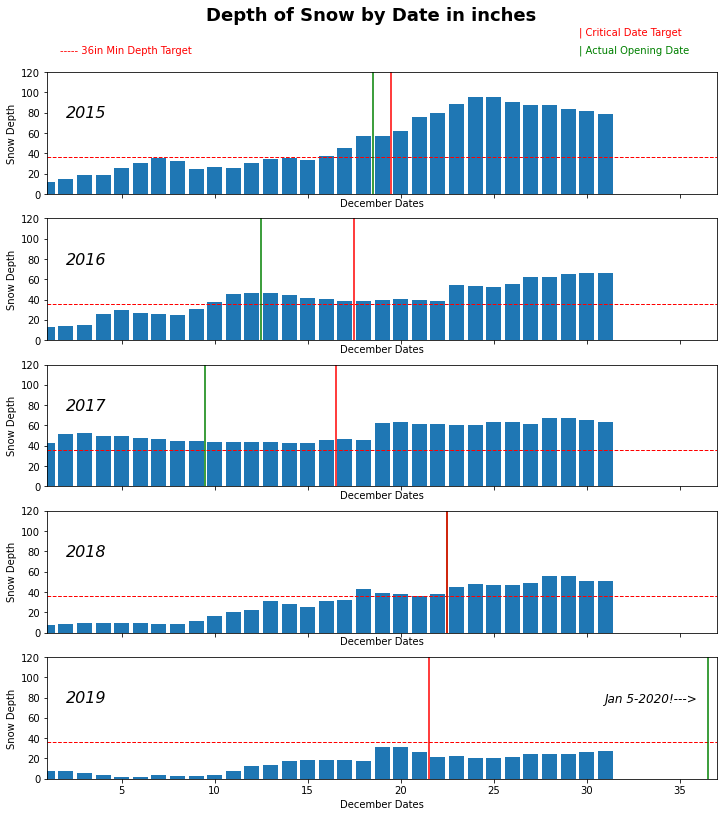

In [24]:
# This cell will create a plot representing the depth of snowpack over the month for each year and illustrate
# related factors to this.

#Represent all dates with day integer plus 0.5 offset so they present between bars for clarity

#Actual opening date for each year at Alpental ski area
Season2015 = 18.5 #'2015-12-18'
Season2016 = 12.5 #'2016-12-12'
Season2017 = 9.5  #'2017-12-09'
Season2018 = 22.5 #'2018-12-22'
Season2019 = 36.5 #'2020-01-05'
seasons = [Season2015, Season2016, Season2017, Season2018, Season2019]

#Critical target date to open for Holiday season(school break begins):

xmas2015 = 19.5 #'2015-12-19'
xmas2016 = 17.5 #'2016-12-17'
xmas2017 = 16.5 #'2017-12-16'
xmas2018 = 22.5 #'2018-12-22'
xmas2019 = 21.5 #'2019-12-21'

crit_dates = [xmas2015, xmas2016, xmas2017, xmas2018, xmas2019]

fig, axs = plt.subplots(5, figsize = (12, 13), sharex=True, sharey=True )

for i, year in enumerate([2015, 2016, 2017, 2018, 2019]):
    #print(year)
    x = fulldec_df['dt_time_pst'].dt.day.unique()
    yrmask = fulldec_df['dt_time_pst'].dt.year == year
    ydepth_max = fulldec_df[yrmask]['total_snow_depth'].groupby(fulldec_df['dt_time_pst'].dt.day).max()
    
    axs[i].bar(x, ydepth_max)
    axs[i].set_ylabel('Snow Depth')
    axs[i].set_xlabel('December Dates')
    axs[i].axhline(36, 0,31, ls='--', lw=1, color='red')
    axs[i].axvline(seasons[i], color='green')
    axs[i].axvline(crit_dates[i], color='red')
    axs[i].text(2, 75, year, style='italic', fontsize=16)
    axs[i].axis([1,37, 0, 120])

axs[4].text(31, 75, 'Jan 5-2020!--->', style='italic', fontsize=12)
plt.suptitle('Depth of Snow by Date in inches',y=0.95,fontsize=18, fontweight='bold')
plt.text(0.14, 0.9, '----- 36in Min Depth Target', fontsize=10, color='red',transform=plt.gcf().transFigure)
plt.text(0.74, 0.92, '| Critical Date Target', fontsize=10, color='red',transform=plt.gcf().transFigure)
plt.text(0.74, 0.9, '| Actual Opening Date', fontsize=10, color='green',transform=plt.gcf().transFigure)

plt.savefig('img/snowdepths.jpg')

In [53]:
fulldec_df['r_or_s'] = 1 #snow
fulldec_df.loc[fulldec_df.temperature_deg_f >= 32, 'r_or_s'] = -1 #rain
fulldec_df #r_or_s is positive for snow and negative for rain

fulldec_df['r_or_s'] = fulldec_df['r_or_s'].fillna(0)

/home/markryman/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/markryman/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/home/markryman/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

In [56]:
a = fulldec_df.r_or_s
len(a)/31/24

5.001344086021505

In [57]:
#null hypothesis: average > 0
#alternative hypothesis: average < 0 

#because we do NOT know standard deviation for the data (meaning we have to calculate it from data) we use t-test. 
#if we were given the standard deviation, we would replace t-test with z-test
from scipy.stats import ttest_1samp
ttest_1samp(a, 0)

# we reject the null hypothesis since p-value is smaller than any reasonable threshold. 

Ttest_1sampResult(statistic=34.32616135456147, pvalue=1.4241143204511094e-224)